Importing Data

In [1]:
from sklearn.datasets import load_iris
iris = load_iris()

Exploring the data

In [2]:
print(iris.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [4]:
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [5]:
print(iris['target_names'])

['setosa' 'versicolor' 'virginica']


In [6]:
print(iris['feature_names'])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [7]:
print(type(iris['data']))

<class 'numpy.ndarray'>


In [8]:
print(iris['data'].shape)

(150, 4)


In [10]:
print(iris['data'][:5])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [11]:
print(iris['target'])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [27]:
iris_df = pd.DataFrame(data=iris['data'], columns=iris['feature_names'])
iris_df['target'] = iris['target']

In [12]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(iris_df.drop('target', axis=1), iris_df['target'], random_state=0)

In [29]:
print(X_train.shape)
print(y_train.shape)

(112, 4)
(112,)


In [30]:
print(X_test.shape)
print(y_test.shape)

(38, 4)
(38,)


Preprocessing the data

In [31]:
import pandas as pd

In [40]:
import seaborn as sns

In [32]:
from pandas.plotting import scatter_matrix

In [33]:
import matplotlib.pyplot as plt

In [34]:
%matplotlib inline

In [37]:
colors = y_train.map({0: 'red', 1: 'green', 2: 'blue'})

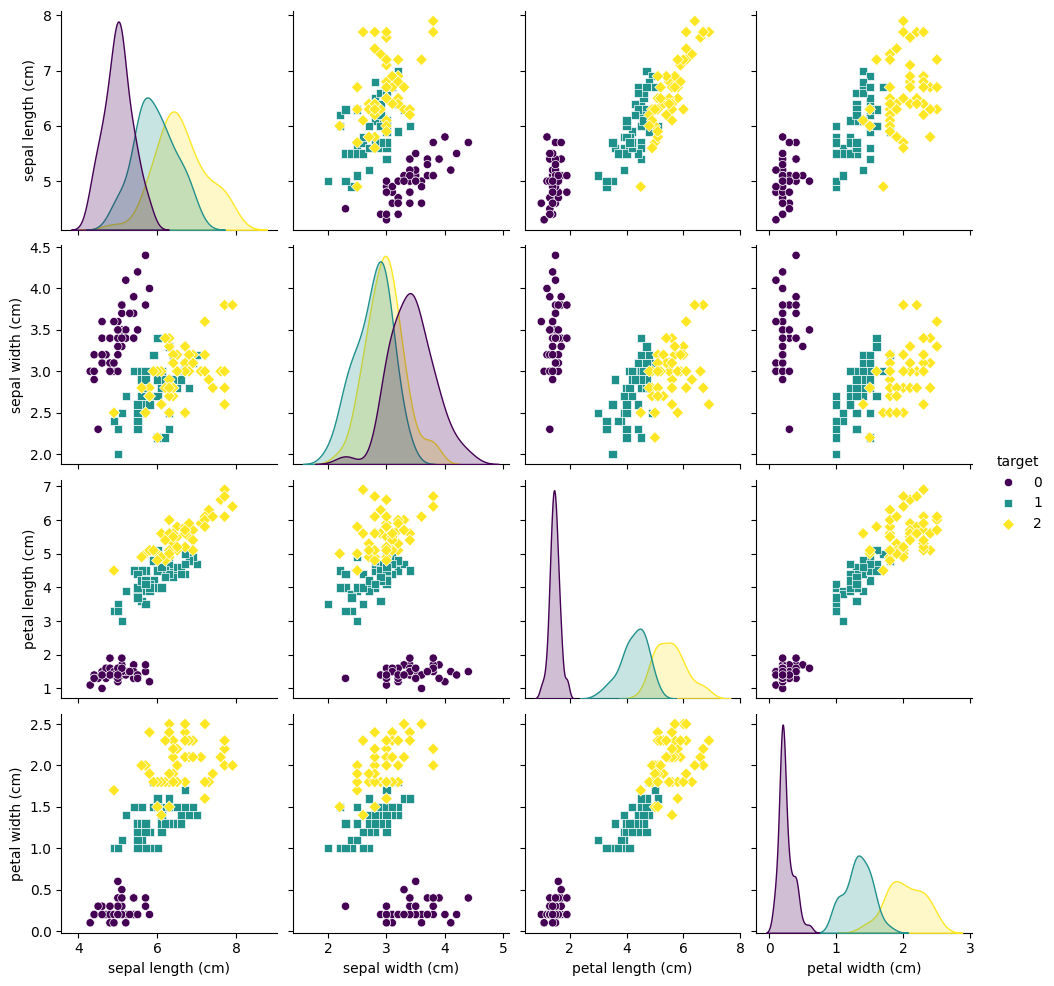

In [41]:
sns.pairplot(iris_df, hue='target', palette='viridis', markers=["o", "s", "D"])

Building the model

In [42]:
from sklearn.neighbors import KNeighborsClassifier

In [43]:
knn=KNeighborsClassifier(n_neighbors=1)

In [44]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

Making predictions

In [45]:
import numpy as np
X_new=np.array([[5,2.9,1,0.2]])
X_new.shape

(1, 4)

In [46]:
prd = knn.predict(X_new)
print('prediction class: ',prd)
print('prediction type:', iris['target_names'][prd])

prediction class:  [0]
prediction type: ['setosa']


c:\users\sıla\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Evaluating the model

In [47]:
y_prd=knn.predict(X_test)
print(y_prd)

[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [48]:
print(np.mean(y_prd==y_test))

0.9736842105263158


In [49]:
print(knn.score(X_test,y_test))

0.9736842105263158
